<a href="https://colab.research.google.com/github/Stevenswe/Skyline-Math-200/blob/main/Copy_of_Python_Notebook_Setup_bySteven_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question # __ : Include question here
Is there a association between the amount of time you thought about suicide 
and the age you started smoking cigerette? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Codebook 1

In [3]:
#Manage data for variable 1
df['H4TO2'].dtype

dtype('O')

In [4]:
#Create new variable 'current_weight' and check the dtype
df['age_first_cig'] = df['H4TO2']

df['age_first_cig'].value_counts()

df['age_first_cig'].dtype

dtype('O')

In [5]:
#Change data type to numeric (integer)

df['age_first_cig']=pd.to_numeric(df['age_first_cig'],errors = 'coerce')
df['age_first_cig'].dtype

dtype('float64')

In [6]:
df['age_first_cig'] = df['age_first_cig'].loc[df['age_first_cig'] < 96] 
df['age_first_cig'].max()

31.0

In [7]:
#Check average

df['age_first_cig'].mean()

15.877315517764956

In [8]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
#import researchPy

import researchpy as rp 

In [10]:
#Create summary stats using ResearchPy
rp.summary_cont(df['age_first_cig'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age_first_cig,3293.0,15.8773,3.5655,0.0621,15.7555,15.9991


In [11]:
rp.summarize(df['age_first_cig'])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,age_first_cig,3293,15.8773,16.0,12.7128,3.5655,0.0621,"[15.7555, 15.9991]"


In [12]:
df['age_first_cig'].describe()

count    3293.000000
mean       15.877316
std         3.565497
min         5.000000
25%        13.000000
50%        16.000000
75%        18.000000
max        31.000000
Name: age_first_cig, dtype: float64

In [13]:
import seaborn as sns

<Axes: xlabel='age_first_cig', ylabel='Count'>

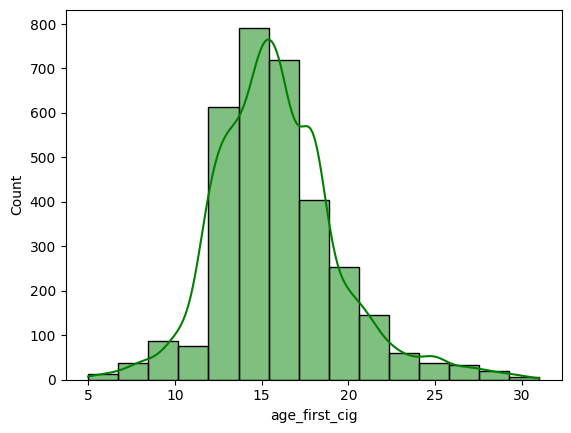

In [14]:
#Graphs and tables or statistics
#Create a histogram with normal curve [kde =True]

sns.histplot( x= 'age_first_cig', data=df, bins = 15, color = 'green', kde = True )

<Axes: xlabel='age_first_cig'>

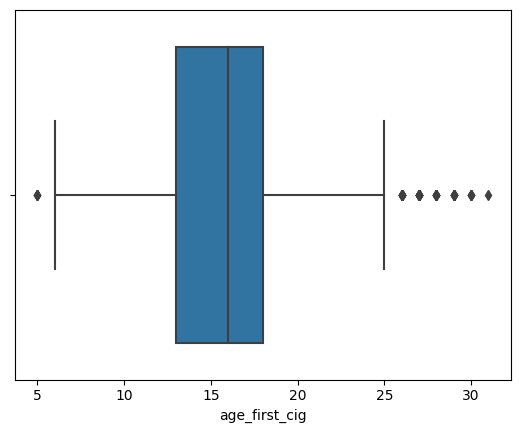

In [15]:
#Create a boxplot


sns.boxplot(x = 'age_first_cig' , data = df)

In [16]:
df['H4SE1'].value_counts()

0    4754
     1392
1     320
7      30
6       5
8       3
Name: H4SE1, dtype: int64

In [17]:
df['times_thought_suicide']=df['H4SE1']
df['times_thought_suicide'].value_counts()

0    4754
     1392
1     320
7      30
6       5
8       3
Name: times_thought_suicide, dtype: int64

In [18]:
df['times_thought_suicide'] = df['times_thought_suicide'].loc[ df['times_thought_suicide'] !=' ']
df['times_thought_suicide'] = df['times_thought_suicide'].loc[ df['times_thought_suicide'] !='6']
df['times_thought_suicide'] = df['times_thought_suicide'].loc[ df['times_thought_suicide'] !='7']
df['times_thought_suicide'] = df['times_thought_suicide'].loc[ df['times_thought_suicide'] !='8']
df['times_thought_suicide'].value_counts()

0    4754
1     320
Name: times_thought_suicide, dtype: int64

In [19]:
df['times_thought_suicide'].replace( ['0','1'] , ['no','yes'], inplace = True)
df['times_thought_suicide'].value_counts()

no     4754
yes     320
Name: times_thought_suicide, dtype: int64

<Axes: ylabel='times_thought_suicide'>

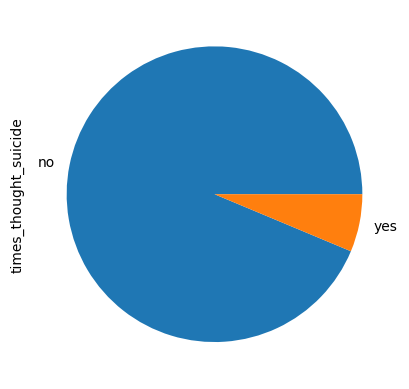

In [20]:
#Basic Pie Chart
df['times_thought_suicide'].value_counts().plot(kind ='pie')

<Axes: ylabel='times_thought_suicide'>

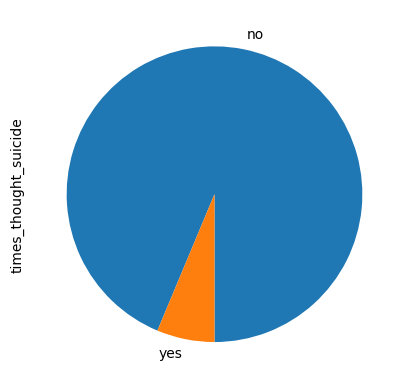

In [21]:
df['times_thought_suicide'].value_counts().plot(kind ='pie',startangle = 270)

<Axes: ylabel='times_thought_suicide'>

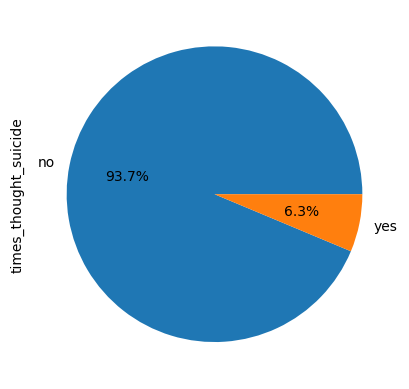

In [23]:
#Add labels
df['times_thought_suicide'].value_counts().plot(kind ='pie', autopct='%1.1f%%')

<Axes: >

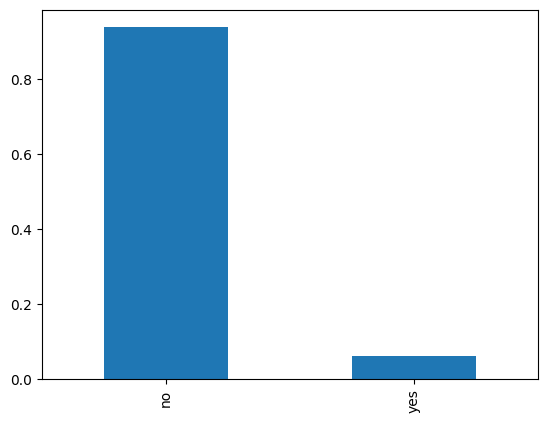

In [26]:
#Basic Bar Chart
df['times_thought_suicide'].value_counts(normalize = True).plot(kind ='bar')

<Axes: >

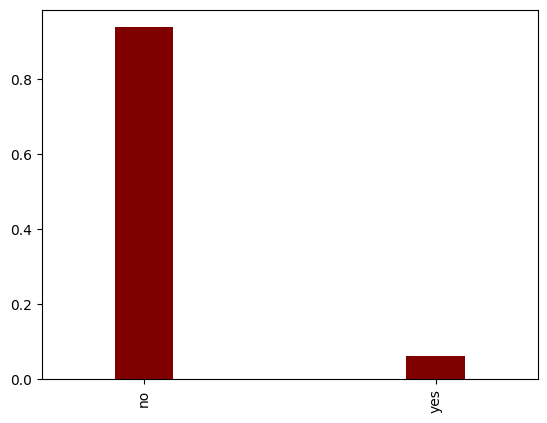

In [27]:
#Change color and width
df['times_thought_suicide'].value_counts(normalize = True).plot(kind ='bar', color = 'maroon', width = 0.2)

<Axes: title={'center': 'How much does your health now limit you in activities?'}, ylabel='Percent'>

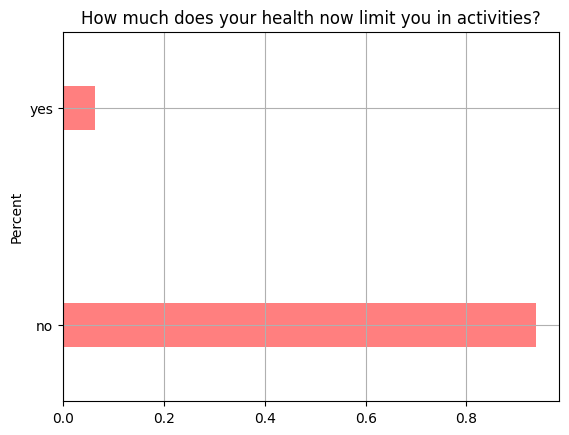

In [37]:
# Add GridLines
plt.xlabel("Amount of Limitations")
plt.ylabel("Percent")
plt.title("How much does your health now limit you in activities?")
df['times_thought_suicide'].value_counts(normalize = True).plot(kind ='barh', color = 'red', width = 0.2, alpha = 0.5, grid = True)

Codebook 2:

In [28]:
#Manage data for variable 1
df['H4WP22'].value_counts()

5    1890
4    1567
     1390
7    1087
3     401
2      90
0      52
1      27
Name: H4WP22, dtype: int64

In [29]:
df['time_talk_mom']=df['H4WP22']
df['time_talk_mom'].value_counts()

5    1890
4    1567
     1390
7    1087
3     401
2      90
0      52
1      27
Name: time_talk_mom, dtype: int64

In [31]:
df['time_talk_mom'] = df['time_talk_mom'].loc[ df['time_talk_mom'] !=' ']
df['time_talk_mom'] = df['time_talk_mom'].loc[ df['time_talk_mom'] !='7']
df['time_talk_mom'].value_counts()

5    1890
4    1567
3     401
2      90
0      52
1      27
Name: time_talk_mom, dtype: int64

In [32]:
df['time_talk_mom'].replace( ['0','1','2','3','4','5'] , ['never','once a year or less','a few times a year','once or twice a month','once or twice a week','almost everyday'], inplace = True)
df['time_talk_mom'].value_counts()

almost everyday          1890
once or twice a week     1567
once or twice a month     401
a few times a year         90
never                      52
once a year or less        27
Name: time_talk_mom, dtype: int64

<Axes: ylabel='time_talk_mom'>

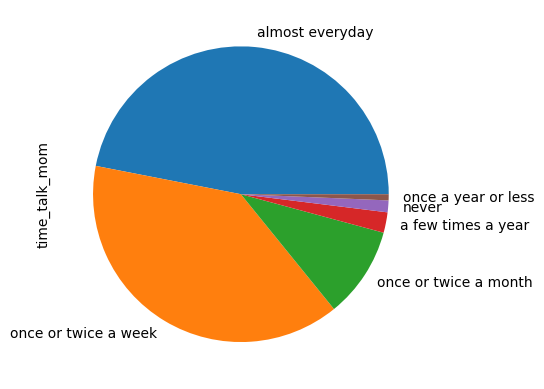

In [33]:
df['time_talk_mom'].value_counts().plot(kind ='pie')

<Axes: ylabel='time_talk_mom'>

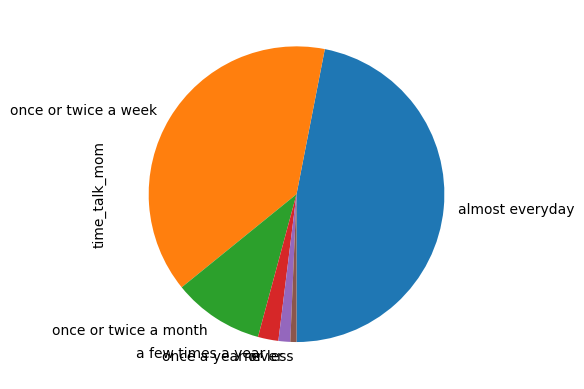

In [34]:
df['time_talk_mom'].value_counts().plot(kind ='pie',startangle = 270)

<Axes: >

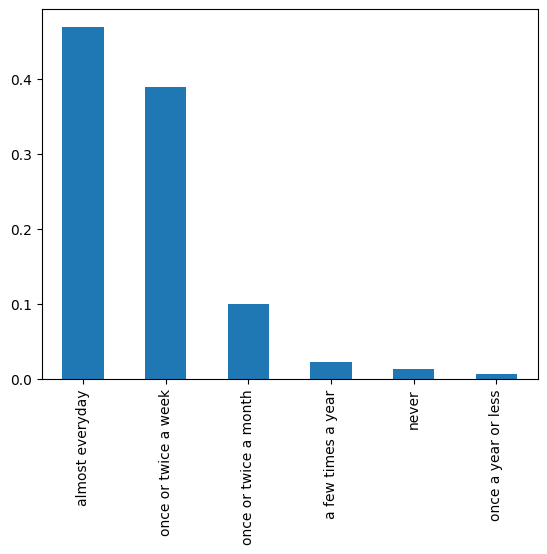

In [35]:
df['time_talk_mom'].value_counts(normalize = True).plot(kind ='bar')

<Axes: >

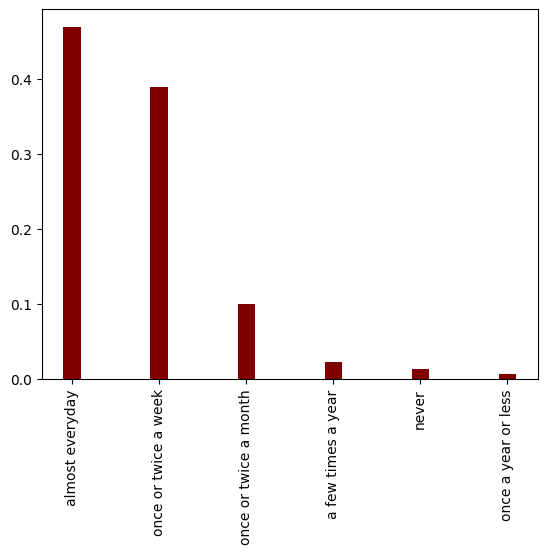

In [36]:
#Change color and width
df['time_talk_mom'].value_counts(normalize = True).plot(kind ='bar', color = 'maroon', width = 0.2)

<Axes: title={'center': 'How much does your health now limit you in activities?'}, ylabel='Percent'>

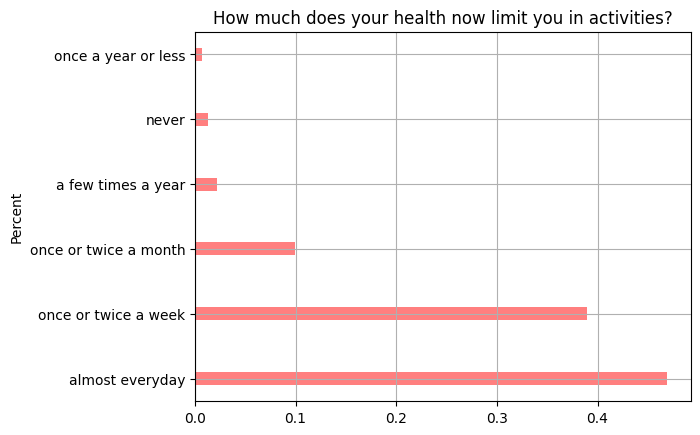

In [38]:
# Add GridLines
plt.xlabel("Amount of Limitations")
plt.ylabel("Percent")
plt.title("How much does your health now limit you in activities?")
df['time_talk_mom'].value_counts(normalize = True).plot(kind ='barh', color = 'red', width = 0.2, alpha = 0.5, grid = True)

In [46]:
#Manage data for variable 1
df['H4WS4'].value_counts()

3     2319
      1390
2     1121
4      861
5      620
1      145
95      46
96       1
98       1
Name: H4WS4, dtype: int64

In [47]:
df['amount_friend']=df['H4WS4']
df['amount_friend'].value_counts()

3     2319
      1390
2     1121
4      861
5      620
1      145
95      46
96       1
98       1
Name: amount_friend, dtype: int64

In [51]:
df['amount_friend'] = df['amount_friend'].loc[ df['amount_friend'] !=' ']
df['amount_friend'] = df['amount_friend'].loc[ df['amount_friend'] !='95']
df['amount_friend'] = df['amount_friend'].loc[ df['amount_friend'] !='96']
df['amount_friend'] = df['amount_friend'].loc[ df['amount_friend'] !='98']
df['amount_friend'].value_counts()


3    2319
2    1121
4     861
5     620
1     145
Name: amount_friend, dtype: int64

In [52]:
df['amount_friend'].replace( ['1','2','3','4','5'] , ['none','1 or 2 friends','3 to 5 friends','6 to 9 friends','10 or more friends'], inplace = True)
df['amount_friend'].value_counts()

3 to 5 friends        2319
1 or 2 friends        1121
6 to 9 friends         861
10 or more friends     620
none                   145
Name: amount_friend, dtype: int64

<Axes: ylabel='amount_friend'>

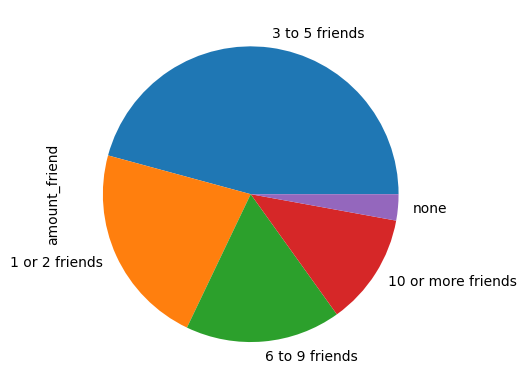

In [53]:
#Basic Pie Chart
df['amount_friend'].value_counts().plot(kind ='pie')

<Axes: ylabel='amount_friend'>

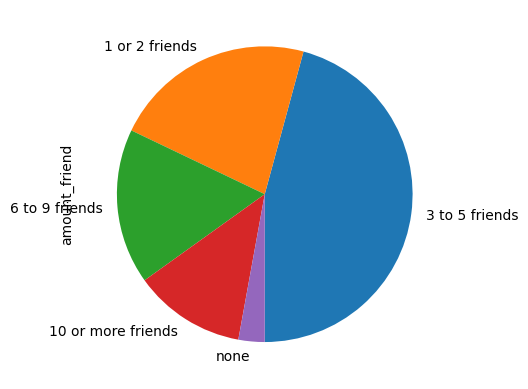

In [54]:
df['amount_friend'].value_counts().plot(kind ='pie',startangle = 270)

<Axes: >

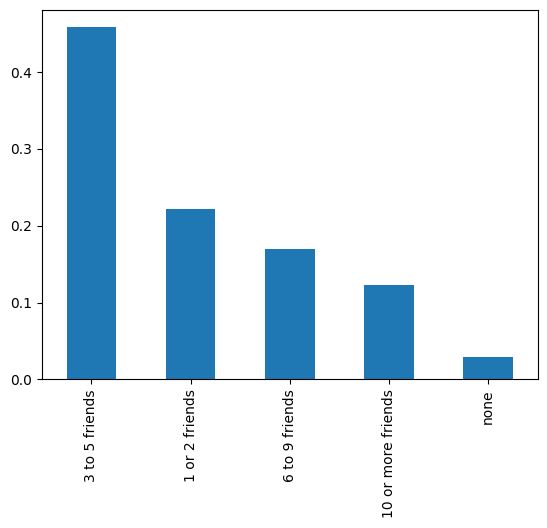

In [55]:
df['amount_friend'].value_counts(normalize = True).plot(kind ='bar')

<Axes: >

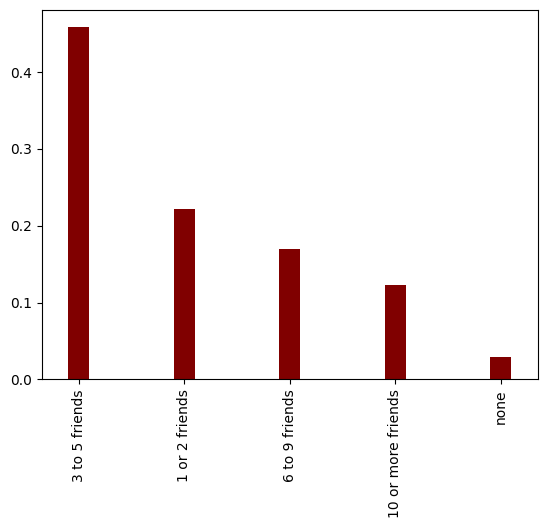

In [56]:
#Change color and width
df['amount_friend'].value_counts(normalize = True).plot(kind ='bar', color = 'maroon', width = 0.2)

<Axes: title={'center': 'How much does your health now limit you in activities?'}, ylabel='Percent'>

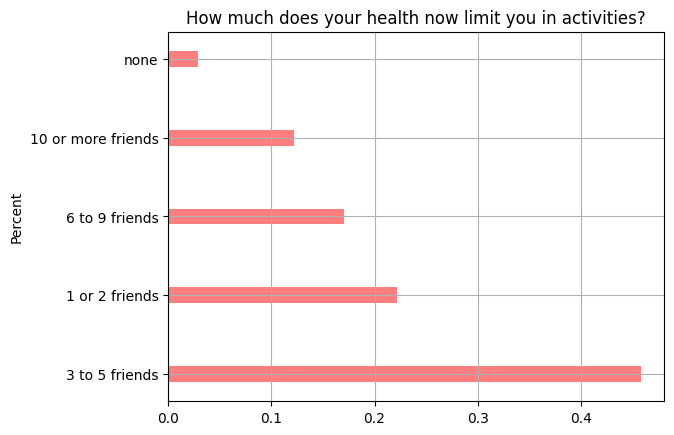

In [57]:
# Add GridLines
plt.xlabel("Amount of Limitations")
plt.ylabel("Percent")
plt.title("How much does your health now limit you in activities?")
df['amount_friend'].value_counts(normalize = True).plot(kind ='barh', color = 'red', width = 0.2, alpha = 0.5, grid = True)

In [ ]:
#Graphs and tables or statistics